En este archivo realizo el EDA de cada csv creado por moneda, trayendome el DF que contiene, fechas desde enero del 2020 hasta la actualidad, precio de cierre, capitalizacion de mercado y volumen del mercado (la cantidad de una criptomoneda que se ha comprado y vendido en todos los intercambios en el dia)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import time as t
import plotly.graph_objects as go
sns.set()


In [2]:
lido= pd.read_csv(r'C:\Users\flori\Desktop\DATA SCIENCE\LABS\Trabajos\tp2\Proyecto2_Data_Analytics\ETL\lidostaked.csv')

In [3]:
lido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 972 entries, 0 to 971
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FECHAS          972 non-null    object 
 1   PRECIO-usd      972 non-null    float64
 2   MARKET_CAP-usd  972 non-null    float64
 3   TOTAL_VOLUMES   972 non-null    float64
 4   COIN_ID         972 non-null    object 
dtypes: float64(3), object(2)
memory usage: 38.1+ KB


In [4]:
lido.describe()

,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES
count,972.000000,9.720000e+02,9.720000e+02
mean,2199.220110,6.114699e+09,2.294435e+07
std,919.204698,4.078268e+09,5.304366e+07
min,596.767711,0.000000e+00,6.217976e+01
25%,1564.169699,2.985849e+09,3.520456e+06
50%,1868.189833,5.942395e+09,1.023573e+07
75%,2862.132292,8.339977e+09,2.279108e+07
max,4775.452755,1.539444e+10,8.349852e+08


In [5]:
lido['FECHAS']=pd.to_datetime(lido['FECHAS'])

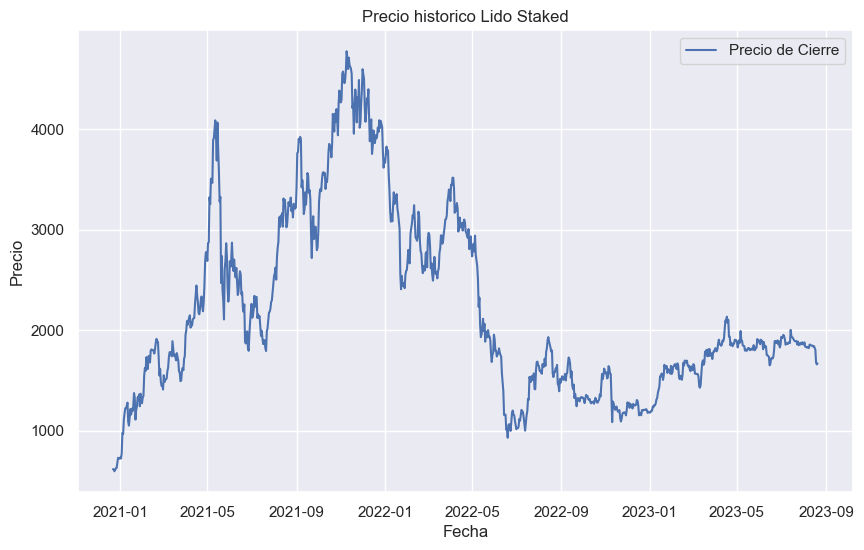

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(lido['FECHAS'], lido['PRECIO-usd'], label='Precio de Cierre')
plt.title('Precio historico Lido Staked')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

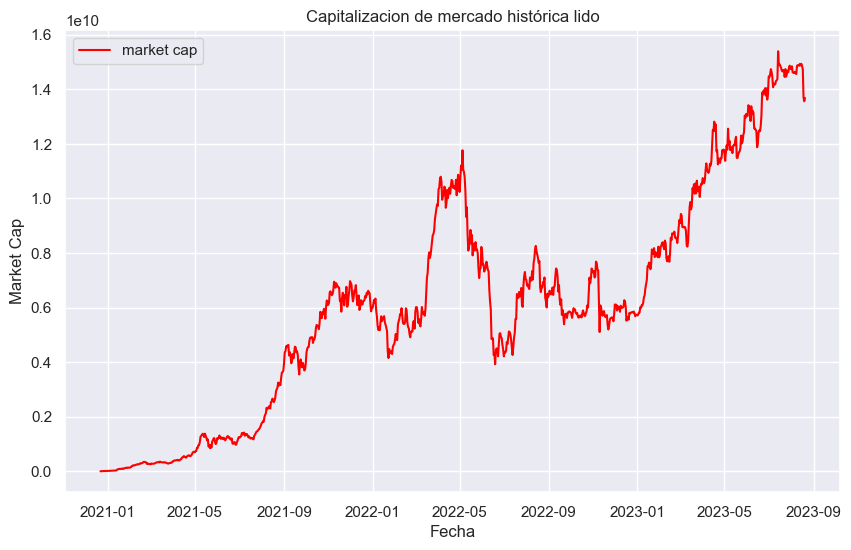

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(lido['FECHAS'], lido['MARKET_CAP-usd'], label='market cap', color='red')
plt.title('Capitalizacion de mercado histórica lido')
plt.xlabel('Fecha')
plt.ylabel('Market Cap')
plt.legend()
plt.grid(True)
plt.show()

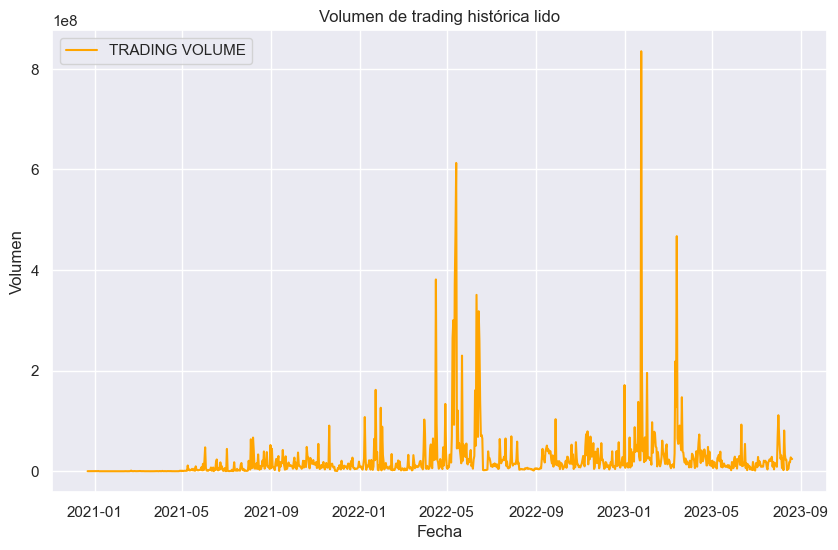

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(lido['FECHAS'], lido['TOTAL_VOLUMES'], label='TRADING VOLUME', color='orange')
plt.title('Volumen de trading histórica lido')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
from ta.momentum import RSIIndicator

# Calcular RSI
rsi_period = 14  # Período típico para RSI
indicator = RSIIndicator(lido['PRECIO-usd'], window=rsi_period)
lido['RSI'] = indicator.rsi()

lido.tail()

,FECHAS,PRECIO-usd,MARKET_CAP-usd,TOTAL_VOLUMES,COIN_ID,RSI
967,2023-08-16,1826.361340,1.484988e+10,1.829936e+07,staked-ether,42.252510
968,2023-08-17,1807.898559,1.473226e+10,1.777613e+07,staked-ether,38.112486
969,2023-08-18,1678.531050,1.370034e+10,2.755366e+07,staked-ether,21.911632
970,2023-08-19,1659.990165,1.356056e+10,2.526507e+07,staked-ether,20.562553
971,2023-08-20,1668.863869,1.368345e+10,2.436172e+07,staked-ether,23.005869


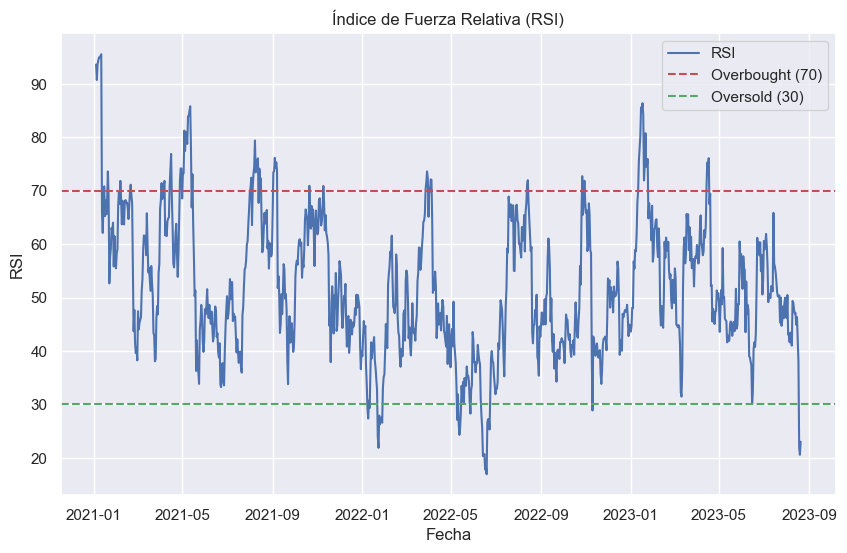

In [10]:
import matplotlib.pyplot as plt

# Graficar el RSI
plt.figure(figsize=(10, 6))
plt.plot(lido['FECHAS'], lido['RSI'], label='RSI')
plt.axhline(y=70, color='r', linestyle='--', label='Overbought (70)')
plt.axhline(y=30, color='g', linestyle='--', label='Oversold (30)')
plt.title('Índice de Fuerza Relativa (RSI)')
plt.xlabel('Fecha')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
rolling_window = 50
lido['MovingAverage'] = lido['PRECIO-usd'].rolling(window=rolling_window).mean()

print(lido.head())

      FECHAS  PRECIO-usd  MARKET_CAP-usd  TOTAL_VOLUMES       COIN_ID  RSI  \
0 2020-12-22  617.164997    0.000000e+00  137563.026557  staked-ether  NaN   
1 2020-12-23  617.164997    0.000000e+00  137563.026557  staked-ether  NaN   
2 2020-12-24  596.767711    4.424223e+06   67102.259216  staked-ether  NaN   
3 2020-12-25  611.504712    5.651613e+06   54336.794215  staked-ether  NaN   
4 2020-12-26  624.800420    7.284744e+06   45933.064541  staked-ether  NaN   

   MovingAverage  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  


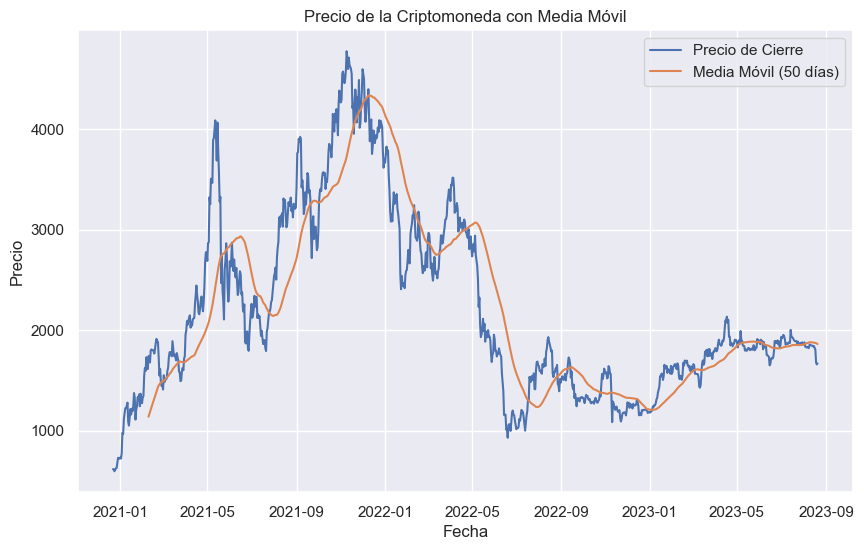

In [12]:
# Graficar los datos y la media móvil
plt.figure(figsize=(10, 6))
plt.plot(lido['FECHAS'], lido['PRECIO-usd'], label='Precio de Cierre')
plt.plot(lido['FECHAS'], lido['MovingAverage'], label=f'Media Móvil ({rolling_window} días)')
plt.title('Precio de la Criptomoneda con Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
lido.to_csv('lidoDB.csv', index=False)